
                                                                                                Test started: 18.06.2018
                                                                                                Test submitted: 22.06.2018                                                                           
- Name:Sultan Arapov                                                                                 
- GitHub: https://github.com/arapoff/portfolio
- Kaggle: https://www.kaggle.com/arapoff
- Linkedin: https://www.linkedin.com/in/sultan-arapov-67451b162/
- Associate, 2 years
- Applied for a position Data Quality Analyst



# **Problems to be solved with SQL**
- Write a query to extract only listings with a property type “quinta” or “house”;
- Write a query to extract only listings of properties with a pool;
- Write a query to extract listings where a property type is not “plot”;
- Write a query calculating the average price per square meter of all apartments in Nagüeles. 

In [1]:
import pandas as pd
import numpy as np
import re
import sqlite3
pd.options.display.max_colwidth = 100
import matplotlib
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('assignment_data.csv')
df.head()

,id,title,features,living_area,total_area,plot_area,price
0,44525,"Stunning 6 bedroom villa in the heart of the Golden Mile, Marbella",NaN,NaN,918.0,NaN,4400000
1,44859,"Villa for sale in Rocio de Nagüeles, Marbella Golden Mile",NaN,NaN,NaN,NaN,2400000
2,45465,One level 5 bedroom villa for sale in Nagüeles,NaN,NaN,393.0,NaN,1900000
3,50685,Large estate for sale in Rocio de Nagueles,NaN,0.0,640.0,0.0,4250000
4,130728,Palatial Villa on Marbellas Golden Mile with Panoramic Sea Views,"Fireplace, Elevator, Terrace, Mountain view, Freight Elevator, Air conditioning, Patio, Guest to...",0.0,4903.0,11000.0,32000000


**I used pure sql`s regular expressions (LIKE statements), although for SQLITE traditional regular expression is available**

In [3]:
# Write a query to extract only listings with a property type “quinta” or “house”

# Here'quinta' can mean both property type and location name like Quinta da Marinha.
# While, 'house' can either mean 'house', penthouse','townhouse' or agency name, as house is used very widely 
# beyond being a terminology for the property type

# To distinguish property type from location name
# I need not to get property type 'quinta' confused for location 'Quinta da Marinha',
# 'house' for penthouse, townhouse, town house or real estate agency

conn = sqlite3.connect("properties.db") 
df.to_sql('features', conn, if_exists='replace', index=False) 

p_type = pd.read_sql("""
SELECT title FROM features 
WHERE title NOT LIKE '%town%house%' and title NOT LIKE '%pent%house%' 
and title NOT LIKE '%a%art%ment%quinta_d%' and title NOT LIKE '%quinta_d%a%art%ment%'
and title NOT LIKE '%duplex%quinta_d%' and title NOT LIKE '%quinta_d%duplex%'
and title NOT LIKE '%villa%quinta_d%' and title NOT LIKE '%quinta_d%villa%'
and title NOT LIKE '%country_estate%Quinta_d%' and title NOT LIKE '%quinta_d%country_estate%'
and title NOT LIKE '%moradia%quinta_d%' and title NOT LIKE '%quinta_d%moradia%'
and title NOT LIKE '%plot%quinta_d%' and title NOT LIKE '%quinta_d%plot%'
and title NOT LIKE '%land%quinta_d%' and title NOT LIKE '%quinta_d%land%'

and title NOT LIKE '%house%agency%'
and title NOT LIKE '%a%art%ment%'
and title NOT LIKE '%duplex%'
and title NOT LIKE '%villa%'
and title NOT LIKE '%country_estate%'
and title NOT LIKE '%moradia%'
and title NOT LIKE '%plot%'
and title NOT LIKE '%land%'
and title NOT LIKE '%house%agency%'

and title LIKE '%house%'
and title LIKE '%quinta%'
;""", conn)

print('{} instances were found'.format(p_type.shape[0]))
p_type.head()

43 instances were found


,title
0,Beautiful detached house in Cascais - Quinta da Marinha Cascais  Cascais e Estoril For sale
1,"House in condominium in Cascais, Quinta da Marinha For sale"
2,"Detached house V5 in Quinta da Marinha, Cascais"
3,"Cascais, Quinta da Marinha\n House 8 bedrooms / REF: 033160091\n\n ..."
4,House 5 bedrooms in the sand near the roundabout of the horses at the North entrance of Quinta d...


In [4]:
# Write a query to extract only listings of properties with a pool
pool = pd.read_sql("""SELECT * FROM features WHERE features LIKE '%pool%';""", conn)
print('p_feature shape {}'.format(pool.shape))
pool.head()

p_feature shape (1545, 7)


,id,title,features,living_area,total_area,plot_area,price
0,130857,Modern Design Penthouse on second line beach Golden Mile,"Elevator, Terrace, Alarm system, Mountain view, Swimming pool, Air conditioning, Basement, Sea/l...",220.0,530.0,0.0,3900000
1,130897,Spacious Beachside Villa Casablanca Marbella Golden Mile,"Fireplace, Elevator, Terrace, Alarm system, Swimming pool, Basement, Guest toilet, Built-in kitchen",411.0,450.0,600.0,3148000
2,130917,Modern Designer Villa with Stunning Views Golden Mile,"Fireplace, Terrace, Alarm system, Mountain view, Swimming pool, Air conditioning, Basement, Pati...",470.0,845.0,1000.0,2950000
3,130978,Beautiful Villa at the top of Nagüeles with panoramic views,"Security system, Fireplace, Terrace, Jacuzzi, Air conditioning, Swimming pool, Basement, Sauna, ...",619.0,738.0,1391.0,2400000
4,131037,Luxurious Villa in Private Gated Community Marbella Golden Mile,"Fireplace, Elevator, Terrace, Alarm system, Accessible for wheelchairs, Mountain view, Jacuzzi, ...",403.0,603.0,0.0,1950000


In [5]:
# Write a query to extract listings where a property type is not “plot”
plot = pd.read_sql("""SELECT * FROM features WHERE title NOT LIKE '%plot%'
AND features NOT LIKE '%plot%'
;""", conn)
print('{} instances were found'.format(plot.shape[0]))
plot.head()

3542 instances were found


,id,title,features,living_area,total_area,plot_area,price
0,130728,Palatial Villa on Marbellas Golden Mile with Panoramic Sea Views,"Fireplace, Elevator, Terrace, Mountain view, Freight Elevator, Air conditioning, Patio, Guest to...",0.0,4903.0,11000.0,32000000
1,130857,Modern Design Penthouse on second line beach Golden Mile,"Elevator, Terrace, Alarm system, Mountain view, Swimming pool, Air conditioning, Basement, Sea/l...",220.0,530.0,0.0,3900000
2,130897,Spacious Beachside Villa Casablanca Marbella Golden Mile,"Fireplace, Elevator, Terrace, Alarm system, Swimming pool, Basement, Guest toilet, Built-in kitchen",411.0,450.0,600.0,3148000
3,130917,Modern Designer Villa with Stunning Views Golden Mile,"Fireplace, Terrace, Alarm system, Mountain view, Swimming pool, Air conditioning, Basement, Pati...",470.0,845.0,1000.0,2950000
4,130978,Beautiful Villa at the top of Nagüeles with panoramic views,"Security system, Fireplace, Terrace, Jacuzzi, Air conditioning, Swimming pool, Basement, Sauna, ...",619.0,738.0,1391.0,2400000


In [6]:
# Write a query calculating the average price per square meter of all apartments in Nagüeles
average_price = pd.read_sql("""SELECT AVG(price/total_area) FROM features WHERE title 
LIKE '%apartment%' AND title LIKE '%nag_eles%';""", conn)

average_price.head()

,AVG(price/total_area)
0,2967.020359


In [7]:
print('Amount of null values {}'.format(df.isnull().sum()))
print('\nDataframe shape {}'.format(df.shape))
print('\nData types {}'.format(df.dtypes))

Amount of null values id               0
title            0
features       941
living_area      3
total_area       1
plot_area        3
price            0
dtype: int64

Dataframe shape (4910, 7)

Data types id               int64
title           object
features        object
living_area    float64
total_area     float64
plot_area      float64
price            int64
dtype: object


# Problem to be solved in Python: 

# **Part 1:**

- Classify the type of each listing, describe in detail the procedure and explain why is your
procedure a good choice; are there any disadvantages in using such approach?

- Classify the location of each property, describe in detail the procedure and explain why is your
procedure a good choice; are there any disadvantages in using such approach?
- Identify the presence of pool, garage, sea view in each property;



# **Answer:**

I chose regular expression as a data extraction method for the following reasons: 
 - We have a long string textual data with a lot of collocation, which means that we have to be specific yet flexible with the type of words we want extract. Regex in this case would be more efficient than alternative approaches like tokenization, splitting string into individual words, stemming or Levenshtein distance approach.
 - We need to account for grammar, spelling mistakes and language differences. Regex deals with these problems greatly
 - Regex has all the necessary functions of extractions and replacements
 - Regex is built into Pandas framework, which makes it very handy and easy to use

To sum up, regex is most straightforward, flexible, time and computationally efficient than any other approach that I have known so far
 
There are disadvantages in any tool depending on a problem we have at hand. However, in this particular case, I saw Regex as 
the optimal approach to solving our problem. However, in contrast to a small number of  property types and features we had to extract here, we can have cases where we have to extract a bigger amount of different words from hundreds to thousands. 
In those cases we would have to appeal to a more complex approaches of NLP, where we would combine technics of stemming, tf-idf methods, n-gram methods and others.

So, next to the very end I will provide step-by-step explanation to the code

In [8]:
# First, by calling df.sample(30) several times I analyze listing title to identify instances for cleaning

# The fact, that location like 'Quinta da Marinha' includes the property type name in its name, can be confused for 
# a property type name during the extraction process. The same way some listings may include real estate agency title, 
# which in turn may include property type name in its title. 

# Therefore, using regex function 'replace' I first remove collocations ''Quinta da','Quinta do', 
# 'HOUSE AGENCY', 'town house' and 'townhouse'
df['title_1'] = df['title'].replace('[qQ][uU][iI][nN][tT][aA]\s*[dD][oOaA]|[hH]\w\w\w[eE]\s*[aA]\w\w\w\w[yY]|[tT]\w\w[nN]\s*[hH]\w\w\w[eE]', 
                                    '', regex=True)

# Extract property types and covert their names to lower case. 
# Words with same meaning are like apartment, apartamento, apartamentos...
df['type'] = df['title_1'].str.extract('(a[p]+art[\w]+ent|penthouse|duplex|house|villa|country estate|moradia|quinta|plot|land)', 
                                       flags=re.IGNORECASE, expand=False).str.lower()

df['type'] = df['type'].replace('a[p]+art[\w]+ent', 'apartment', regex=True)


locations = ['alenquer', 'quinta da marinha', 'golden mile', 'nagueles']

# Extract locations and convert their names to lower case
df['location name'] = df['title'].str.extract('(alenquer|quinta da marinha|golden mile|nag[uü]eles)', 
                                       flags=re.IGNORECASE, expand=False).str.lower()
df['location name'] = df['location name'].replace('nag[uü]eles', 'nagueles', regex=True)


# Extract pool, garage, sea view either from title or features, as any of the variables 
# may contain information on the features of our interest
def extract_features():
    df['features'].fillna('', inplace=True)
    df['title_features'] = df['title'] + ' ' + df['features'] # Concatenate column title with column features
    
    # Extracting features
    df['pool'] = df['title_features'].str.extract('(pool|piscina)', flags=re.IGNORECASE, expand=False).str.lower()
    df['sea view'] = df['title_features'].str.extract('(sea view|vista do mar|vista marítima)', flags=re.IGNORECASE, expand=False).str.lower()
    df['garage'] = df['title_features'].str.extract('(gara[gj][em]*)', flags=re.IGNORECASE, expand=False).str.lower()
    
    # Generalize features by replacing each feature with the names of our interest and fill out missing values with 0 
    df['pool'] = df['pool'].replace('pool|piscina', 'pool', regex=True).fillna(0)
    df['sea view'] = df['sea view'].replace('sea view|vista do mar|vista marítima', 'sea view', regex=True).fillna(0)
    df['garage'] = df['garage'].replace('gara[gj][em]*', 'garage', regex=True).fillna(0)
    
    # Replace features with value 1
    df.replace({'pool': 'pool', 
                'sea view': 'sea view', 
                'garage': 'garage'
               }, value = int(1), inplace=True)
    
    df['type'].fillna('other type', inplace=True)
    return(df)

extract_features()

# Hereby, we identify the presence of pool, garage, sea view in each property 
final = df[['id', 'location name', 'type', 'title', 'features', 'pool', 'sea view', 'garage']]
final.head()

,id,location name,type,title,features,pool,sea view,garage
0,44525,golden mile,villa,"Stunning 6 bedroom villa in the heart of the Golden Mile, Marbella",,0,0,0
1,44859,nagueles,villa,"Villa for sale in Rocio de Nagüeles, Marbella Golden Mile",,0,0,0
2,45465,nagueles,villa,One level 5 bedroom villa for sale in Nagüeles,,0,0,0
3,50685,nagueles,other type,Large estate for sale in Rocio de Nagueles,,0,0,0
4,130728,golden mile,villa,Palatial Villa on Marbellas Golden Mile with Panoramic Sea Views,"Fireplace, Elevator, Terrace, Mountain view, Freight Elevator, Air conditioning, Patio, Guest to...",0,1,0


In [9]:
# final.to_csv('Python_Part_1.csv')

# **Part 2: Identify outliers**
- Identify undervalued, overvalued, and normal properties in the dataset. 

In [10]:
# Evaluating property value is dependent on many factors, given the information constraint

# We will assume that:

# Undervalued plot will be a property within certain type and location whose price per squared meter is under 0.25 quantile,
# but it has sea view 

# Overvalued plot will be a property within certain type and location whose price per squared meter is above 0.75 quantile,
# but it does not have sea view

# Undervalued house or apartment will be a property within certain type and location whose price per squared meter 
# is under 0.25 quantile, but it has sea view or its plot_area is equal or greater than 0.5 quantile 

# Overvalued house or apartment will be a property within certain type and location whose price per squared meter 
# is above 0.75 quantile, but it does not have sea view and its plot_area is equal or lower than 0.5 quantile 
 

In [11]:
# First, drop duplicate listings
print('Shape before removing duplicate listings: {}'.format(df.shape))
df.drop_duplicates(['plot_area', 'living_area', 'total_area'], inplace=True)
print('Shape before removing duplicate listings: {}'.format(df.shape))

Shape before removing duplicate listings: (4910, 14)
Shape before removing duplicate listings: (1751, 14)


In [12]:
# As recommended, as for group plots we will use plot_area 
plots_group = ['plot', 'land']

# Create a separate dataframe for group plots
plots = df[df['type'].isin(plots_group)]

# To have an adequate data, we filter it out by leaving plot_area bigger than 0,
# plots price bigger than 0 and plots price bigger than property area
plots = plots[(plots.plot_area>0) & (plots.price>0) & (plots.price>plots.plot_area)]
plots.drop(['living_area', 'total_area','title_1', 'features', 'title_features'], axis=1, inplace=True)

# We get price of a plot per squared meter and can see a summary table below
plots['price/sq.m.'] = plots['price']/plots['plot_area']
plots['price/sq.m.'] = plots['price/sq.m.'].astype(int)
plots.groupby(['location name', 'type'])['price/sq.m.'].describe() 

count         mean         std     min      25%  \
location name     type                                                    
alenquer          land   45.0   262.133333  558.817567     1.0    21.00   
golden mile       plot    2.0   534.500000  200.111219   393.0   463.75   
nagueles          plot   27.0   649.000000  363.908167   292.0   382.00   
quinta da marinha land    2.0  1131.500000  265.165043   944.0  1037.75   
                  plot    1.0  1001.000000         NaN  1001.0  1001.00   

                           50%      75%     max  
location name     type                           
alenquer          land    88.0   192.00  3511.0  
golden mile       plot   534.5   605.25   676.0  
nagueles          plot   514.0   916.00  1860.0  
quinta da marinha land  1131.5  1225.25  1319.0  
                  plot  1001.0  1001.00  1001.0

In [13]:
b = plots.set_index(['location name', 'type'])
a = plots.groupby(['location name', 'type'])['price/sq.m.'].describe()

c = a.join(b)
c['area'] = c['plot_area']

c.reset_index(inplace=True)
c['under-valued'] = pd.Series()
c['over-valued'] = pd.Series()
c['normal'] = pd.Series()

c.fillna(0, inplace=True)
# Undervalued plot will be a property within certain type and location whose price per squared meter is under 0.25 quantile,
# but it has sea view 
c.loc[(c['price/sq.m.']<c['25%']) & (c['sea view']==1), 'under-valued'] = 1

# Overvalued plot will be a property within certain type and location whose price per squared meter is above 0.75 quantile,
# but it does not have sea view
c.loc[(c['price/sq.m.']>c['75%']) & (c['sea view']==0), 'over-valued'] = 1 

# Normal plot
c.loc[(c['under-valued']==0) & (c['over-valued']==0), 'normal'] = 1 

Plots = c

# We can see those plots that are undervalued, overvalued and normal
Plots.head()


,location name,type,count,mean,std,min,25%,50%,75%,max,...,plot_area,price,pool,sea view,garage,price/sq.m.,area,under-valued,over-valued,normal
0,alenquer,land,45.0,262.133333,558.817567,1.0,21.0,88.0,192.0,3511.0,...,57733.0,2415000,0,0,0,41,57733.0,0.0,0.0,1.0
1,alenquer,land,45.0,262.133333,558.817567,1.0,21.0,88.0,192.0,3511.0,...,18400.0,850000,0,0,0,46,18400.0,0.0,0.0,1.0
2,alenquer,land,45.0,262.133333,558.817567,1.0,21.0,88.0,192.0,3511.0,...,200.0,702250,0,0,0,3511,200.0,0.0,1.0,0.0
3,alenquer,land,45.0,262.133333,558.817567,1.0,21.0,88.0,192.0,3511.0,...,2880.0,399200,0,0,0,138,2880.0,0.0,0.0,1.0
4,alenquer,land,45.0,262.133333,558.817567,1.0,21.0,88.0,192.0,3511.0,...,7280.0,238000,0,0,0,32,7280.0,0.0,0.0,1.0


In [14]:
aps_houses = ['villa', 'penthouse', 'duplex', 'apartment','house', 'moradia', 'quinta']

home = df[df['type'].isin(aps_houses)]

# As recommended, for groups ‘apartments’ and ‘houses’ we will use the highest value between total_area and living_area
home['area1'] = home.loc[home['total_area']>home['living_area'], 'total_area']
home['area2'] =  home.loc[home['total_area']<home['living_area'], 'living_area']

home.fillna(0, inplace=True)
home['area'] = home['area1'] + home['area2']

# Remove unnecessary anymore features
home.drop(['area1', 'area2', 'living_area', 'total_area','title_1', 'features', 'title_features'], axis=1, inplace=True)

home = home[(home.area>0) & (home.price>0) & (home.price>home.area)]
home['price/sq.m.'] = home['price']/home['area']
home['price/sq.m.'] = home['price/sq.m.'].astype(int)

home.groupby(['location name', 'type'])['price/sq.m.'].describe() 

count         mean          std     min      25%  \
location name     type                                                          
alenquer          apartment    7.0   707.285714   311.307840    41.0   699.50   
                  duplex       2.0  1307.500000   492.853426   959.0  1133.25   
                  house       20.0  1317.700000  1781.063582     2.0   270.50   
                  moradia    150.0   756.520000   443.859639     2.0   472.50   
                  quinta      16.0  1607.687500  1502.029725     1.0   652.75   
                  villa       53.0   989.754717   515.849893   234.0   675.00   
golden mile       apartment   44.0  5249.704545  2280.263353   937.0  3726.50   
                  duplex       6.0  5936.000000  3331.674354  3630.0  3738.00   
                  house        2.0  2603.500000   316.076731  2380.0  2491.75   
                  penthouse   15.0  5699.400000  3698.666493    52.0  4620.50   
                  villa       31.0  6439.096774  4342.575744  2300.0  3621.50   
nagueles          apartment  172.0  3035.401163  1023.696853   453.0  2325.00   
                  duplex       9.0  4199.555556  1515.788500  1932.0  3283.00   
                  house       11.0  2311.636364  1530.238365   161.0  1428.00   
                  penthouse   26.0  3417.115385  1666.855658  1468.0  2211.75   
                  villa      305.0  4072.298361  2188.024787   820.0  2777.00   
quinta da marinha apartment   20.0  4514.900000  2065.503249   871.0  3322.00   
                  duplex       5.0  5206.200000  2515.657906   713.0  6191.00   
                  house       14.0  5203.714286  1873.280316  1428.0  4047.50   
                  moradia    225.0  6087.208889  2620.757913  1033.0  4743.00   
                  villa       56.0  4951.803571  3562.695907   509.0  2931.00   

                                50%      75%      max  
location name     type                                 
alenquer          apartment   800.0   857.50    996.0  
                  duplex     1307.5  1481.75   1656.0  
                  house      1055.5  1353.75   7954.0  
                  moradia     727.5   949.50   2625.0  
                  quinta      856.5  2860.25   4540.0  
                  villa       860.0  1126.00   2388.0  
golden mile       apartment  5106.5  6472.00  11557.0  
                  duplex     3921.5  8470.00  10480.0  
                  house      2603.5  2715.25   2827.0  
                  penthouse  6077.0  6669.50  16105.0  
                  villa      5555.0  7100.00  24965.0  
nagueles          apartment  2916.0  3517.00   6764.0  
                  duplex     4326.0  4816.00   6770.0  
                  house      1889.0  2992.50   5971.0  
                  penthouse  3160.0  3865.25   7142.0  
                  villa      3706.0  4932.00  26818.0  
quinta da marinha apartment  4941.0  6360.25   8000.0  
                  duplex     6191.0  6442.00   6494.0  
                  house      5280.5  6360.25   8799.0  
                  moradia    5605.0  7058.00  24420.0  
                  villa      4961.0  5956.00  21653.0

In [15]:
d = home.set_index(['location name', 'type'])
e = home.groupby(['location name', 'type'])['price/sq.m.'].describe()

f = e.join(d)
f['plot_area_50%'] = f.groupby(['location name', 'type'])['plot_area'].quantile(0.5)

f.reset_index(inplace=True)
f['under-valued'] = pd.Series()
f['over-valued'] = pd.Series()
f['normal'] = pd.Series()

f.fillna(0, inplace=True)

# Undervalued house or apartment will be a property within certain type and location whose price per squared meter 
# is under 0.25 quantile, but it has sea view or its plot_area is equal or greater than 0.5 quantile 
f.loc[((f['price/sq.m.']<f['25%']) & (f['plot_area']>f['plot_area_50%']))
| ((f['price/sq.m.']<f['25%']) & (f['sea view']==1)), 'under-valued'] = 1

# Overvalued house or apartment will be a property within certain type and location whose price per squared meter 
# is above 0.75 quantile, but it does not have sea view and its plot_area is equal or lower than 0.5 quantile 
f.loc[(f['price/sq.m.']>f['75%']) & (f['plot_area']<=f['plot_area_50%']) & (f['sea view']==0), 'over-valued'] = 1 

# Normal property
f.loc[(f['under-valued']==0) & (f['over-valued']==0), 'normal'] = 1 

Homes = f

Homes.head()

,location name,type,count,mean,std,min,25%,50%,75%,max,...,price,pool,sea view,garage,area,price/sq.m.,plot_area_50%,under-valued,over-valued,normal
0,alenquer,apartment,7.0,707.285714,311.30784,41.0,699.5,800.0,857.5,996.0,...,230000,1,0,1,272.0,845,0.0,0.0,0.0,1.0
1,alenquer,apartment,7.0,707.285714,311.30784,41.0,699.5,800.0,857.5,996.0,...,67000,0,0,0,77.0,870,0.0,0.0,1.0,0.0
2,alenquer,apartment,7.0,707.285714,311.30784,41.0,699.5,800.0,857.5,996.0,...,55000,0,0,0,79.0,696,0.0,0.0,0.0,1.0
3,alenquer,apartment,7.0,707.285714,311.30784,41.0,699.5,800.0,857.5,996.0,...,63800,0,0,1,64.0,996,0.0,0.0,1.0,0.0
4,alenquer,apartment,7.0,707.285714,311.30784,41.0,699.5,800.0,857.5,996.0,...,72500,0,0,0,103.0,703,0.0,0.0,0.0,1.0


In [16]:
Plots = Plots[['id', 'location name', 'type', 'area', 'price', 'over-valued', 'under-valued','normal']]
Homes = Homes[['id', 'location name', 'type', 'area', 'price', 'over-valued', 'under-valued','normal']]

# Final table
evaluated = pd.concat([Plots, Homes], axis=0)
evaluated.loc[:, ['over-valued', 'under-valued','normal']] = evaluated.loc[:, ['over-valued', 'under-valued','normal']].astype(int)

evaluated = evaluated[evaluated['type']!='other type']

print('Table shape {}'.format(evaluated.shape))
evaluated.head()

Table shape (1266, 8)


,id,location name,type,area,price,over-valued,under-valued,normal
0,1736911,alenquer,land,57733.0,2415000,0,0,1
1,1737009,alenquer,land,18400.0,850000,0,0,1
2,1743039,alenquer,land,200.0,702250,1,0,0
3,1919398,alenquer,land,2880.0,399200,0,0,1
4,1932276,alenquer,land,7280.0,238000,0,0,1


In [17]:
# evaluated.to_csv('Python_Part_2.csv')

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(40.3664,0.5,'price')

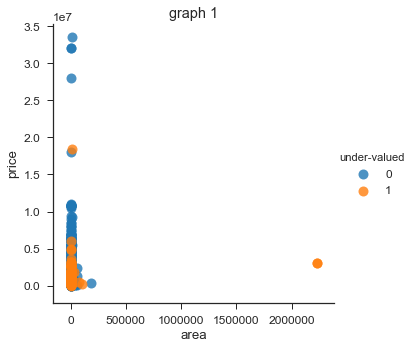

In [19]:
sns.set_context("notebook", font_scale=1.2)
sns.set_style("ticks")

sns.lmplot('area', 
           'price', 
           data=evaluated, 
           fit_reg=False, 
           hue="under-valued", 
           scatter_kws={"marker": "D", 
                        "s": 100}) 

plt.title('graph 1')
plt.xlabel('area')
plt.ylabel('price')

Text(39.1933,0.5,'price')

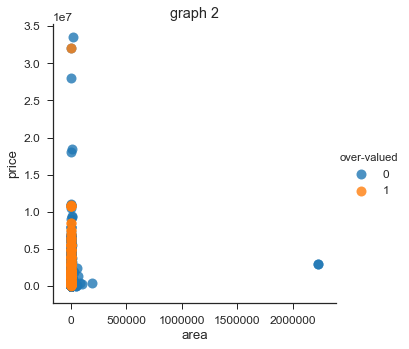

In [20]:
sns.set_context("notebook", font_scale=1.2)
sns.set_style("ticks")

sns.lmplot('area', 
           'price', 
           data=evaluated, 
           fit_reg=False, 
           hue="over-valued", 
           scatter_kws={"marker": "D", 
                        "s": 100}) 

plt.title('graph 2')
plt.xlabel('area')
plt.ylabel('price')

**Describe what is the difference between under-valued, over-valued properties and outliers**

Depending on the nature and amount of data available one can set his own standard for defining a certain property
as either undervalued or overvalued. For example, for a property market fundamentally there are factors like mortgage rate
and historic price for a property. As well, as in this case, I grounded my analysis on price quantiles per squared meter and
availability of major features like sea view and size of the plot.

Outliers is a different term. Depending on the data nature and distribution, one can also set his own standards
for defining outliers. One can identify outliers either visually looking at the graph or by using the formula
like the one below (IQR method). Outliers are anomalies of data set, that can either be entered by a human or machine 
generated mistake OR it can appear naturally. For example, if a couple of students at the school are much higher or 
shorter than the most of students, then we could define their heights as outliers and can skip their data
in analyzing height of students for our class, as such a data may cause discrepancy in the data or statistical analysis
by biasing mean average or other central tendency metrics.

In [21]:
# # Identifying outliers according to IQR method
# upper_quantile = df.groupby(['location name', 'type'])['price/sq.m.'].describe()['75%'] 
# lower_quantile = df.groupby(['location name', 'type'])['price/sq.m.'].describe()['25%']
# IQR = upper_quantile - lower_quantile

# lower_bound = lower_quantile - 1.5*IQR
# upper_bound = upper_quantile + 1.5*IQR

# **Part 3: Theoretical questions** 


**1.Mention at least 2 hidden traps you found while solving the problems and what would help you to clean the data set;**

Well, I will try to describe some important traps, as I think it is more of a matter of interpretation when defining a trap as hidden or apparent. 

One of popular traps was when property type name spelled the same way as some locations names. So, one has to be careful by
trying to analyz text for many instances. Thus one can observe text by widening cells, by calling, for example, 
'pd.options.display.max_colwidth = n'.

Also, it can be tricky that both variables title and features sometimes contained the same information on features like pool. 

Another potential trap can happen when ad moderator may fail to correct some ad listings or off web scraping accidentally property type may get spelling mistakes, although in this case it was not a big deal. 

Other potential trick is the duplicate listings. We have to focus on different variables to spot the repeated listings, as they all have different ids. Iterated ads may confuse our analysis, as they directly affect our calculations and thus, may result in incorrect conclusions.

Other trap may occur when same property type spell differently as a result of language differences. For example, apartamento, appartement mean 'apartment', but are written differently in Spanish and Portuguese. Also, I was a bit confused whether to consider 'casa' as house, because in Portuguese and Spanish casa means house. Same applies for 'terreno', which means 'land' and so on so forth. I was not sure if I was checked for knowledge of the languages, so I refrained from including those words.

It is also worth to mention one minor trap, when two supposedly different locations are written in the same string.
For example, 'Town House for sale in Corona de Nagüeles, Marbella Golden Mile' or 'Nagüeles, Townhouse in an exclusive gated community on the Golden Mile'. One has to get the most out of regular expressions and Google Map when encountering cases like that.



**2.Describe in detail how you would evaluate the price impact of features such as sea view, pool
and garage considering the dataset provided. Your answer should also include how would you
deal with missing values, outliers and duplicated listings (same property listing published by
different agencies);** 

Linear/Multi-linear Regression Analysis as well as Multicollinearity test (relationship between explanatory variables themselves) would be helpful. I could also use Feature importance function of ML algorithm in XGBoost, to calculate contribution of each feature on the output variable. Also, we can appeal to the scikit-learn library for feature analyses. As for dealing with problems with missing values, outliers and duplicated listing please refer to the code and explanation provided above, where I essentially display a prototype for dealing with these general problems.